In [2]:
import matplotlib.pyplot as plt
import math
import random
from scipy import integrate

In [7]:
# функция считает плотность нормального распределения
def func_arg(z,m,o2):
    rez = 1 / (math.sqrt(2*math.pi) * o2) * math.exp((-1 * (z - m)**2) / (2 * o2**2))
    return rez

In [22]:
# рассчет эксперементальной вероятности
def p_e_gen(N, m1, m2, o, xg, n):
    y1i = []
    y2i = []
    N12 = 0
    N21 = 0
    for i in range(n):
        y1tek = 0
        y2tek = 0
        for j in range(0, N+1):
            y1tek = y1tek + (norm(m1, o) / N)
            y2tek = y2tek + (norm(m2, o) / N)
        y1i.append(y1tek)
        y2i.append(y2tek)

    for i in range(n):
        if y2i[i] < xg:
            N12 = N12 + 1
        if y1i[i] > xg:
            N21 = N21 + 1
    p12e = N12 / n
    p21e = N21 / n
    p_e = (p12e + p21e) / 2
    return p_e

In [23]:
# рассчет теоретической вероятности
def p_t_gen(N, xg, xmin, xmax, o, m1, m2):
    func1 = lambda z: 1 / (math.sqrt(2 * math.pi) * (o / math.sqrt(N))) * math.exp((-1 * (z - m1) ** 2) / (2 * (o / math.sqrt(N)) ** 2))
    func2 = lambda z: 1 / (math.sqrt(2 * math.pi) * (o / math.sqrt(N))) * math.exp((-1 * (z - m2) ** 2) / (2 * (o / math.sqrt(N)) ** 2))
    p12_t = integrate.quad(func1, xg, xmax)[0]
    p21_t = integrate.quad(func2, xmin, xg)[0]
    p_t = (p12_t + p21_t) / 2
    return p_t


In [24]:
# m1, m2 - математическое ожидание для классов 1 и 2
m1 = 4
m2 = 6
# o - среднеквадратическое отклонение
o = math.sqrt(2)
n = 101
xmin = round(m1 - 3 * o,2)
xmax = round(m2 + 3 * o,2)
# верхняя и нижняя граница области определения изменяемого параметра x
print('xmin, xmax: ', xmin, ' ', xmax)

xmin, xmax:  -0.24   10.24


In [25]:
# массив 
x = []
fx1 = []
fx2 = []
for i in range(n - 1):
    zn = xmin + (((xmax - xmin) / (n - 1)) * i)
    x.append(zn)
    fx1.append(func_arg(zn, m1, o))
    fx2.append(func_arg(zn, m2, o))

In [26]:
fgi = []
xg = (m1 + m2) / 2
for i in range(n-1):
    if x[i] > xg:
        fgi.append(0.5)
    else:
        fgi.append(0)

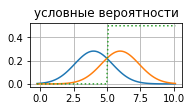

In [27]:
plt.subplot(3, 2, 1)
plt.grid()
plt.plot(x, fx1)
plt.plot(x, fx2)
plt.plot(x, fgi, ":")
plt.title('условные вероятности')
plt.show()

In [28]:
# функция нормального распределения
def norm(m,o):
    v = 48
    rez = 0
    for ii in range(1,48):
        rez = rez + random.random()
    rez = math.sqrt(12 / v) * o * (rez - (v / 2)) + m
    return rez

In [29]:
x1i = []
x2i = []
xgi = []
for i in range(n - 1):
    x1i.append(norm(m1, o))
    x2i.append(norm(m2, o))
    xgi.append(xg)

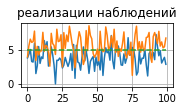

In [30]:
plt.subplot(3, 2, 2)
plt.grid()
plt.plot(x1i)
plt.plot(x2i)
plt.plot(xgi, "--")
plt.title('реализации наблюдений')
plt.show()

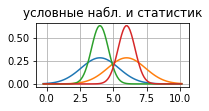

In [31]:
pt = []
pe = []
j = []
for nn in range(1, 11):
    f1ni = []
    f2ni = []
    for i in range(n-1):
        f1ni.append(func_arg(x[i], m1, (o**2 / math.sqrt(nn))))
        f2ni.append(func_arg(x[i], m2, (o**2 / math.sqrt(nn))))
    if nn == 10:
        plt.subplot(3, 2, 3)
        plt.grid()
        plt.plot(x, fx1)
        plt.plot(x, fx2)
        plt.plot(x, f1ni)
        plt.plot(x, f2ni)
        plt.title('условные набл. и статистик')
        plt.show()
    pe.append(p_e_gen(nn, m1, m2, o, xg, n))
    pt.append(p_t_gen(nn, xg, xmin, xmax, o, m1, m2))
    j.append(nn)

Text(0.5, 1.0, 'зависимости эксп. и теор. вероятностей от ошибок')

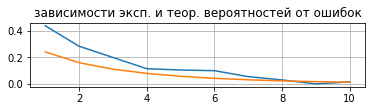

In [32]:
plt.subplot(3, 1, 3)
plt.grid()
plt.plot(j, pe)
plt.plot(j, pt)
plt.title('зависимости эксп. и теор. вероятностей от ошибок')

In [34]:
from prettytable import PrettyTable
x = PrettyTable()
nt = ["n"]
nt.extend(j)
x.field_names = nt
nt = ["PT"]
for i in pt:
    nt.append(round(i, 3))
x.add_row(nt)
nt = ["PE"]
for i in pe:
    nt.append(round(i, 3))
x.add_row(nt)
print(x)

+----+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| n  |   1   |   2   |   3   |   4   |   5   |   6   |   7   |   8   |   9   |   10  |
+----+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| PT |  0.24 | 0.159 |  0.11 | 0.079 | 0.057 | 0.042 | 0.031 | 0.023 | 0.017 | 0.013 |
| PE | 0.436 | 0.282 | 0.198 | 0.114 | 0.104 | 0.099 | 0.054 |  0.03 |  0.0  | 0.015 |
+----+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
